In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import norm, skew #for some statistics
#from scipy.stat import norm
from sklearn.preprocessing import StandardScaler
#from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['sample_submission.csv', 'data_description.txt', 'test.csv', 'train.csv']


In [2]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

In [3]:
print(train.shape)
print(test.shape)


(1460, 81)
(1459, 80)


In [4]:
#save the id columns
train_ID = train['Id']
test_ID = test['Id']

#Drop ID column
train.drop('Id', axis = 1, inplace = True)
test.drop('Id', axis = 1, inplace = True)

In [5]:
#describe the sale price

train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

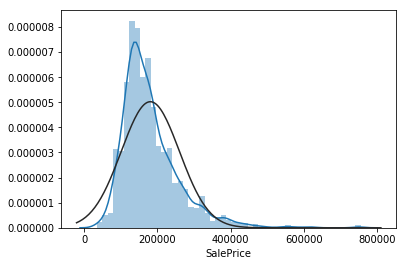

In [6]:
#histogram
sns.distplot(train['SalePrice'], fit = norm)

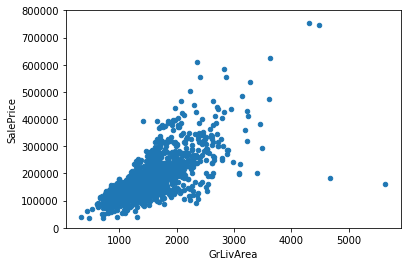

In [7]:
#Scatterplot GrLivArea vs SalePrice
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice',ylim=(0,800000));

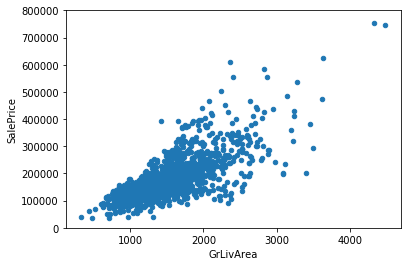

In [8]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Scatterplot GrLivArea vs SalePrice
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice',ylim=(0,800000));

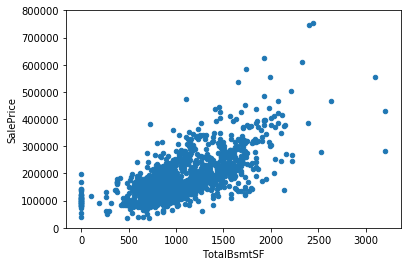

In [9]:
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis =1)
data.plot.scatter(x = var, y = 'SalePrice' , ylim = (0 , 800000))

(-0.5, 9.5, 0, 800000)

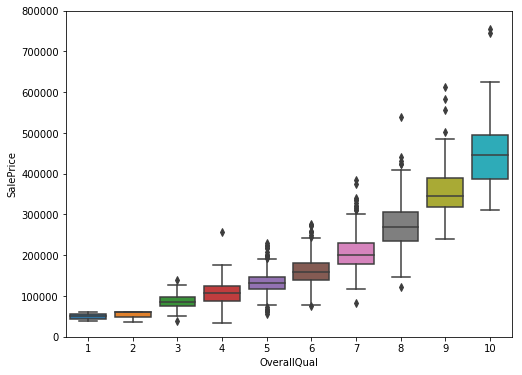

In [10]:
#Relationship with Categorical variables

#Boxplot for OverallQual/SalePrice

var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis = 1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x = var, y = 'SalePrice' , data = data)
fig.axis(ymin = 0, ymax = 800000)

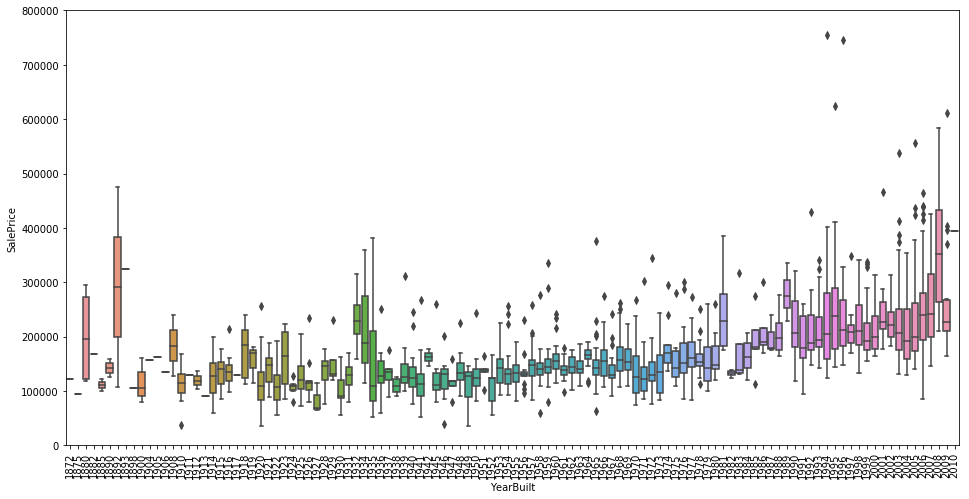

In [11]:
#boxplot for yearbuilt

var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis = 1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot( x= var, y = 'SalePrice', data = data)
fig.axis(ymin = 0, ymax = 800000);
plt.xticks(rotation=90);

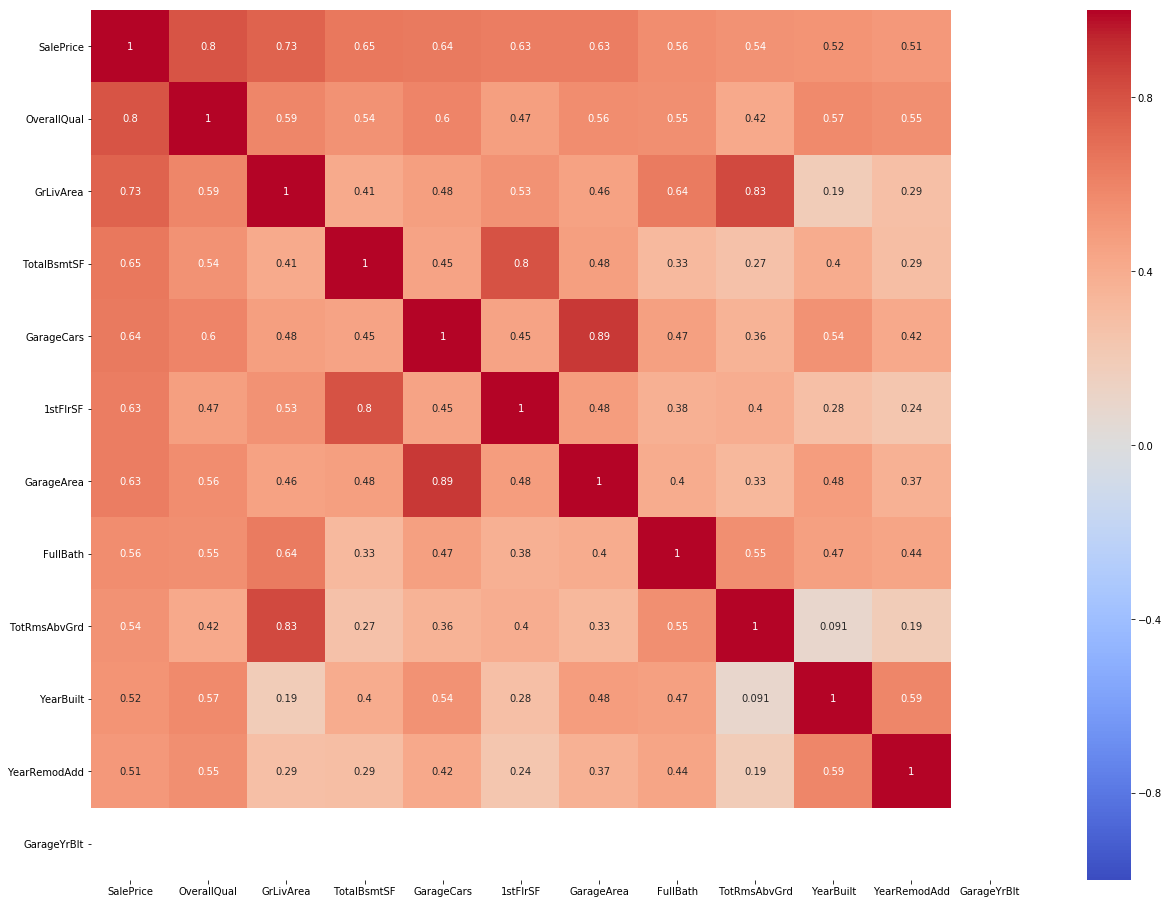

In [12]:
corrmat = train.corr()
#matrix = np.triu(df_train.corr())
f, ax = plt.subplots(figsize=(21, 16))
k = 12
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.heatmap(cm, annot = True , vmin=-1, vmax=1, center= 0,cmap = 'coolwarm', yticklabels=cols.values, xticklabels=cols.values)

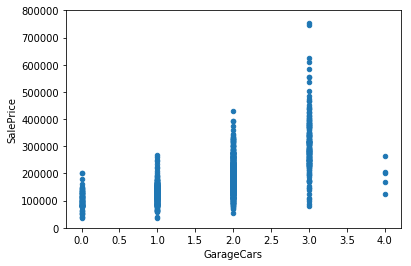

In [13]:
var = 'GarageCars'
data = pd.concat([train['SalePrice'], train[var]], axis =1)
data.plot.scatter(x = var, y = 'SalePrice' , ylim = (0 , 800000))

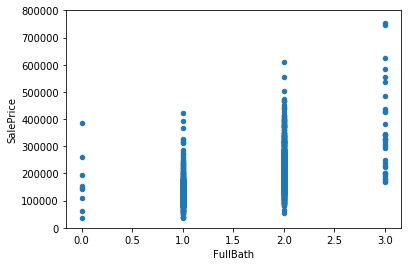

In [14]:
var = 'FullBath'
data = pd.concat([train['SalePrice'], train[var]], axis =1)
data.plot.scatter(x = var, y = 'SalePrice' , ylim = (0 , 800000))

In [15]:
print("skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

skewness: 1.881296
Kurtosis: 6.523067


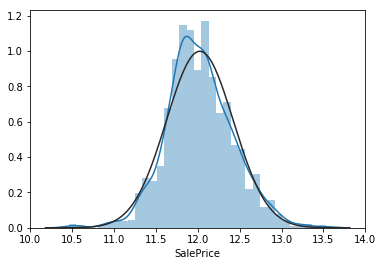

In [16]:
#log tansformation of the saleprice 
train['SalePrice'] = np.log1p(train['SalePrice'])
                                    
#Check the new distribution
sns.distplot(train['SalePrice'], fit = norm);


In [17]:
# Merging train and test together for easy feature engineering
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop = True)
all_data.drop(['SalePrice'], axis = 1, inplace = True)
print(all_data.shape)

(2917, 79)


In [18]:
#missing Data

Total = all_data.isnull().sum().sort_values(ascending=False)
Percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Total, Percent], axis = 1, keys=['Total', 'Percent'])
missing_data.head(40)

,Total,Percent
PoolQC,2908,0.996915
MiscFeature,2812,0.964004
Alley,2719,0.932122
Fence,2346,0.804251
FireplaceQu,1420,0.486802
LotFrontage,486,0.166610
GarageFinish,159,0.054508
GarageQual,159,0.054508
GarageYrBlt,159,0.054508
GarageCond,159,0.054508


In [19]:
#deleteing the missing data
all_data = all_data.drop((missing_data[missing_data['Percent']>.15]).index, 1)
#df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
#all_data.isnull().sum().max()

In [20]:
#Missing value treatment for others
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea' , 'GarageYrBlt', 'GarageArea', 'GarageCars'):
            all_data[col] = all_data[col].fillna(0)
            

In [21]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'MasVnrType'):
    all_data[col] = all_data[col].fillna('None')

In [22]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [23]:
all_data = all_data.drop(['Utilities'], axis=1)

In [24]:
all_data.isnull().sum().sort_values(ascending = False)

YrSold           0
YearRemodAdd     0
EnclosedPorch    0
ExterCond        0
ExterQual        0
Exterior1st      0
Exterior2nd      0
Fireplaces       0
Foundation       0
FullBath         0
Functional       0
GarageArea       0
GarageCars       0
GarageCond       0
GarageFinish     0
GarageQual       0
GarageType       0
Electrical       0
Condition2       0
Condition1       0
BsmtFinSF1       0
2ndFlrSF         0
3SsnPorch        0
BedroomAbvGr     0
BldgType         0
BsmtCond         0
BsmtExposure     0
BsmtFinSF2       0
CentralAir       0
BsmtFinType1     0
                ..
PoolArea         0
RoofMatl         0
RoofStyle        0
SaleType         0
Neighborhood     0
ScreenPorch      0
Street           0
TotRmsAbvGrd     0
TotalBsmtSF      0
WoodDeckSF       0
YearBuilt        0
OpenPorchSF      0
MoSold           0
Heating          0
LotArea          0
HeatingQC        0
HouseStyle       0
KitchenAbvGr     0
KitchenQual      0
LandContour      0
LandSlope        0
LotConfig   

In [25]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [26]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 73 columns):
1stFlrSF         2917 non-null int64
2ndFlrSF         2917 non-null int64
3SsnPorch        2917 non-null int64
BedroomAbvGr     2917 non-null int64
BldgType         2917 non-null object
BsmtCond         2917 non-null object
BsmtExposure     2917 non-null object
BsmtFinSF1       2917 non-null float64
BsmtFinSF2       2917 non-null float64
BsmtFinType1     2917 non-null object
BsmtFinType2     2917 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2917 non-null object
BsmtUnfSF        2917 non-null float64
CentralAir       2917 non-null object
Condition1       2917 non-null object
Condition2       2917 non-null object
Electrical       2917 non-null object
EnclosedPorch    2917 non-null int64
ExterCond        2917 non-null object
ExterQual        2917 non-null object
Exterior1st      2917 non-null object
Exterior2nd      29

In [27]:
from sklearn.preprocessing import LabelEncoder
cols = ('BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1',  'BsmtFinType2', 'Functional',  'BsmtExposure', 
        'GarageFinish', 'LandSlope', 'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold')

for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(list(all_data[c].values))
    
print('shape all_data : {}' .format(all_data.shape))


shape all_data : (2917, 73)


In [28]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [29]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 54 skewed numerical features to Box Cox transform


In [30]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 210)


In [31]:
train = all_data[:ntrain]
test = all_data[ntrain:]

print(train.shape)
print(test.shape)

(1458, 210)
(1459, 210)


In [32]:
#Import the modeling libraries

from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

Define a cross validation strategy
We use the cross_val_score function of Sklearn. However this function has not a shuffle attribut, we add then one line of code, in order to shuffle the dataset prior to cross-validation

In [33]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [34]:
#Lasso regression
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [35]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha =0.0005, random_state=1))

In [36]:
KRR = KernelRidge(alpha = 0.6, kernel = 'polynomial', degree = 2, coef0 = 2.5)

In [37]:
GBoost = GradientBoostingRegressor(n_estimators = 3000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, min_samples_split = 10, loss = 'huber', random_state = 5)

In [38]:
#XGBoost
model_xgb = xgb.XGBRegressor (colsample_bytree = 0.4603, gamma = 0.0468, learning_rate = 0.05, max_depth = 3, min_child_weight = 1.7817, n_estimators = 2200, reg_alpha = 0.4640, 
                              reg_lambda = 0.8571, subsample = 0.5213, silent = 1, random_state = 7, nthread = -1)

In [39]:
#Light GBM
model_lgb = lgb.LGBMRegressor(objective = 'regression', num_leaves = 5, learning_rate = 0.05, n_estimators = 720, max_bin = 55, bagging_fraction = 0.8, bagging_freq = 5, feature_fraction = 0.2319, 
                              feature_fraction_seed = 9, bagging_seed =9, min_data_in_leaf = 6 , min_sum_hessian_in_leaf = 11)

Base Model Score

In [40]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1111 (0.0071)



In [41]:
score = rmsle_cv(ENet)
print("\nElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


ElasticNet score: 0.1118 (0.0074)



In [42]:
score = rmsle_cv(KRR)
print("\nKernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Kernel Ridge score: 0.1149 (0.0070)



In [43]:
score = rmsle_cv(GBoost)
print("\nGradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Gradient Boosting score: 0.1164 (0.0091)



In [44]:
score = rmsle_cv(model_xgb)
print("\nXGBoost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


XGBoost score: 0.1160 (0.0057)



In [45]:
score = rmsle_cv(model_lgb)
print("\nLGBM score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


LGBM score: 0.1152 (0.0055)

